<a href="https://colab.research.google.com/github/JParraArias/SignalsAndSystems2024-2/blob/main/Parcial_2_Se%C3%B1ales%24Sistemas_2024_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Punto 3

Consulte en que consiste la distorsión total de armónicos (Total Harmonic Distortion-(THD)) y el factor de potencia en un circuito electrico. Como puede calcularse el THD desde la FFT?. Como puede calcularse la distorsión del factor de potencia con base al THD?. Genere un ejemplo ilustrativo para el calculo del THD y la distorsión del factor de potencia para un rectificador de onda completa con carga: i) netamente resistiva y ii) carga RC en serie. Establezca las condiciones necesarias para las simulaciones. El usuario podra escoger diferentes valores de R y C. Discuta los resultados obtenidos.

## Simulación

### Rectificador de onda completa resistiva

En este código se importan las bibliotecas necesarias para simulaciones y análisis de datos. numpy se usa para manejar arrays y cálculos matemáticos. scipy proporciona funciones para el análisis de señales y optimización. matplotlib.pyplot se utiliza para crear gráficos. La línea %matplotlib inline es para mostrar gráficos directamente en Colab, mientras que sympy se usa para matemáticas simbólicas y su función init_session() inicia una sesión interactiva.

In [25]:
#paquetes de para simulación
import numpy as np
import scipy
import matplotlib.pyplot as plt
#%matplotlib inline
import scipy.signal as sig
import scipy.optimize as opt
#from IPython.display import Image
import sympy as sym
#sym.init_session()

En este código, se utilizan la biblioteca sympy para definir y manipular expresiones simbólicas. Primero, se define s como un símbolo complejo y t, R, L, y C como símbolos positivos. Luego, se define X como una función simbólica que depende de s. Finalmente, se calcula Y como la función X(s) dividida por el símbolo R. Esta expresión representa una relación simbólica en la que Y es inversamente proporcional a R y está relacionada con la función X(s).

In [26]:
s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = 1/(R) * X
Y

X(s)/R

Primero, se define R_v como 1000, que representa un valor de resistencia para la simulación. Luego, se sustituye el valor de R en la expresión simbólica Y con R_v usando el método subs. Esto produce Y_R, que es la versión de la expresión Y con R reemplazado por 1000. Finalmente, Y_R contiene el resultado de esta sustitución.

In [27]:
R_v = 1000 #valores de simulacion de R
Y_R = Y.subs(R, R_v)
Y_R

X(s)/1000

Primero, se define en este código num como un array de numpy con el valor [1], que representa los coeficientes del numerador de una función de transferencia. Luego, se define den como otro array de numpy con los coeficientes [R_v, 1], que representa los coeficientes del denominador de la misma función de transferencia. A continuación, se crea un objeto TransferFunction de scipy.signal utilizando num y den para representar la función de transferencia. Finalmente, se imprimen los arrays num y den para mostrar los coeficientes usados en la función de transferencia.

In [28]:
num = np.array([1]) #coeficientes del numerador de la funcion de transferencia como numpy array
den = np.array([R_v,1])#coeficientes del denominador de la funcion de transferencia como numpy array
G_n = sig.TransferFunction(num, den) #funcion de transferencia en
print(num)
print(den)

[1]
[1000    1]


En este fragmento de código se define una frecuencia de alimentación Fo de 60 Hz y una frecuencia de muestreo Fs de 1800 Hz. Se generan los tiempos t para simular 5 períodos de la señal de alimentación. La señal de entrada in_o es una onda senoidal y rec_c es una señal de tren de pulsos que simula una rectificación completa. La señal rectificada se obtiene multiplicando in_o por rec_c. Finalmente, se calcula la salida out de la función de transferencia G_n para esta señal rectificada utilizando scipy.signal.

In [29]:
Fo = 60 #frec alimentación
Fs = 30*Fo #frecuencia muestreo
To = 1/Fo #periodo fundamental
Ts = 1/Fs #periodo muestreo
t = np.arange(0, 5*To,Ts) # se simulan 5 peridos de alimentación con un muestreo segun Ts
A = 120 #amplitud entrada
#función de entrada aproximada como onda senoidal rectificada completa
in_o = A*(np.sin(2*np.pi*Fo*t))
rec_c = sig.square(2*np.pi*Fo*t)#función tren de pulsos para simular señal rectificada
#Para rectificador de media onda:
rec_m = 0.5*(sig.square(2*np.pi*Fo*t)+1)
in_ = in_o * rec_c #si se quiere probar con rec media onda multiplicar por rec_m
out = G_n.output(in_, T=t)[1] #evaluar salida ante entrada rectificada mediante aproximacion numérica de scipy

Se utiliza matplotlib para graficar la señal de alimentación in_o en función del tiempo t. La función plt.plot dibuja la gráfica, y plt.legend añade una leyenda que identifica la señal como "Alimentación". Finalmente, plt.show muestra la gráfica.

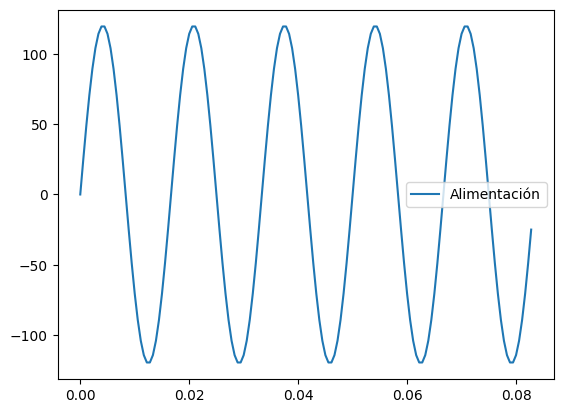

In [30]:
#señales de alimentación y tren de pulsos
plt.plot(t,in_o,label='Alimentación')
plt.legend()
plt.show()

Se utiliza matplotlib para graficar la señal del tren de pulsos rec_c en función del tiempo t. La función plt.plot dibuja la gráfica, y plt.legend añade una leyenda que identifica la señal como "Tren Pulsos". Finalmente, plt.show muestra la gráfica.

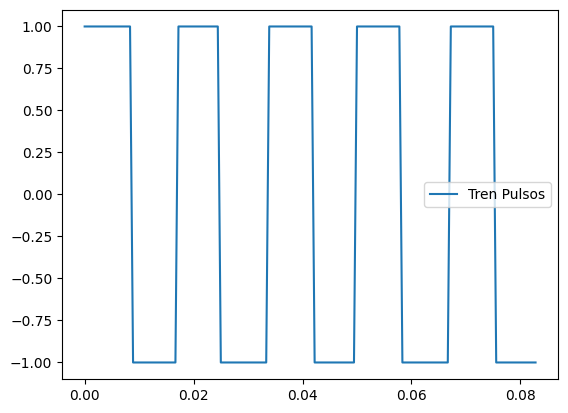

In [31]:
plt.plot(t,rec_c,label='Tren Pulsos')
plt.legend()
plt.show()

Se utilizan las funciones de matplotlib para graficar dos señales: la entrada rectificada in_ y la salida del circuito out. La función plt.plot se usa para dibujar ambas señales en función del tiempo t, con etiquetas correspondientes "In(t)" y "Out(t)". Se añaden etiquetas a los ejes con plt.xlabel y plt.ylabel, y plt.show muestra la gráfica.

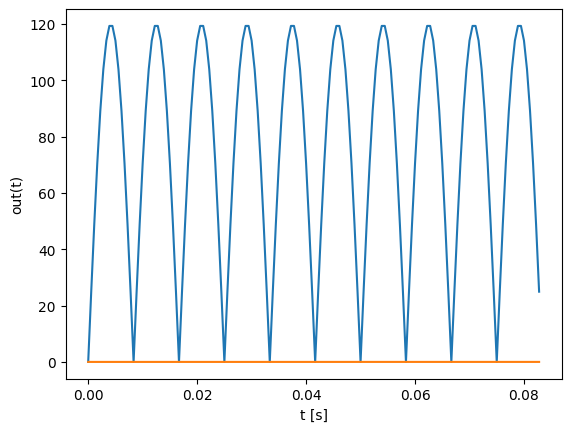

In [32]:
plt.plot(t, in_,label='In(t)')#entrada rectificada
plt.plot(t, out,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

Se calcula el vector de frecuencias vfre usando np.fft.rfftfreq para la Transformada Rápida de Fourier (FFT) con base en el tamaño del vector out y el tiempo de muestreo 1/Fs. Luego, se calcula la FFT de out utilizando np.fft.rfft. Finalmente, se grafica el espectro de frecuencias utilizando plt.stem, mostrando la magnitud de la FFT en función de la frecuencia vfre. Las etiquetas de los ejes se añaden con plt.xlabel y plt.ylabel, y plt.show muestra la gráfica.

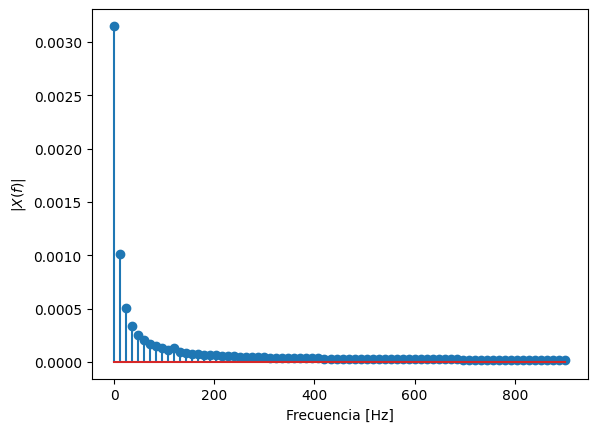

In [33]:
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out)

plt.stem(vfre,abs(Xf/len(out)))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('$|X(f)|$')
plt.show()

Finalmente en este código se realiza una simulación y análisis de un circuito rectificador con el objetivo de calcular dos métricas clave: el Total Harmonic Distortion (THD) y la distorsión del factor de potencia. Primero, simula la respuesta de un circuito con una función de transferencia dada, utilizando una señal de entrada senoidal rectificada. Luego, evalúa la salida del circuito y analiza el contenido en frecuencia mediante la Transformada Rápida de Fourier (FFT). El THD se calcula para medir la cantidad de distorsión armónica en la señal de salida, comparando la potencia de los armónicos con la potencia de la componente fundamental. Además, se calcula la distorsión del factor de potencia, que indica la desviación del factor de potencia ideal debido a la presencia de componentes no lineales en el circuito. Estos análisis proporcionan una visión integral de la calidad de la señal y la eficiencia del sistema rectificador.

In [34]:
# Cálculo del THD (Total Harmonic Distortion)
# El THD se calcula como la relación entre la suma de las potencias de los armónicos y la potencia de la fundamental
fundamental_freq = Fo
harmonics = [2 * fundamental_freq, 3 * fundamental_freq, 4 * fundamental_freq]
fundamental_idx = np.argmin(np.abs(vfre - fundamental_freq))

# Potencia de la componente fundamental
fundamental_power = np.abs(Xf[fundamental_idx])**2

# Potencia de los armónicos
harmonic_powers = [np.abs(Xf[np.argmin(np.abs(vfre - h))])**2 for h in harmonics]
total_harmonic_power = sum(harmonic_powers)

# THD en porcentaje
THD = np.sqrt(total_harmonic_power) / np.sqrt(fundamental_power) * 100

print(f"THD: {THD:.2f}%")

# Cálculo del factor de potencia
# La distorsión del factor de potencia puede ser calculada a partir de la componente fundamental y su relación con el total
V1 = np.sqrt(fundamental_power)  # Tensión de la componente fundamental
Vt = np.sqrt(np.sum(np.abs(Xf)**2))  # Tensión total
PF = V1 / Vt  # Factor de potencia
Distortion = 1 - PF  # Distorsión del factor de potencia

print(f"Distorsión del factor de potencia: {Distortion:.2f}")

THD: 79.54%
Distorsión del factor de potencia: 0.94


###Rectificador de onda completa RC

Este código proporciona una base para la simulación y el análisis de señales en Python, importando las bibliotecas necesarias para realizar cálculos numéricos, visualizaciones gráficas, procesamiento de señales, optimización y matemáticas simbólicas.

In [35]:
#paquetes de para simulación
import numpy as np
import scipy
import matplotlib.pyplot as plt
#%matplotlib inline
import scipy.signal as sig
import scipy.optimize as opt
#from IPython.display import Image
import sympy as sym
#sym.init_session()

El código configura una representación simbólica para un sistema en el dominio de Laplace. Define variables simbólicas para el tiempo y los parámetros del circuito, así como una función simbólica de entrada. Luego, define una función de transferencia Y para un filtro pasa-bajo RC, que es un componente común en circuitos electrónicos para atenuar señales de alta frecuencia. La función de transferencia Y muestra cómo la entrada X se transforma en la salida en el dominio de Laplace.

In [36]:
s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = 1/(R*C*s + 1) * X
Y

X(s)/(C*R*s + 1)

En este fragmento de código se realiza la sustitución de los valores específicos para los parámetros de resistencia y capacitancia en la función de transferencia simbólica Y. Esto permite obtener una expresión concreta para la función de transferencia del circuito RC con los valores de resistencia y capacitancia proporcionados. La función de transferencia Y_RC resultante se puede usar para análisis adicionales, como simular la respuesta del sistema o realizar cálculos numéricos en el dominio de Laplace con estos parámetros específicos.

In [37]:
R_v = 1000 #valores de simulacion de R
C_v =  10e-6 # valores de simulacion de C
Y_RC = Y.subs(R, R_v).subs(C, C_v)
Y_RC

X(s)/(0.01*s + 1)

En este código define la función de transferencia de un sistema utilizando los coeficientes del numerador y del denominador en el formato requerido por SciPy. Se crea un objeto TransferFunction que representa el sistema RC con los valores de resistencia y capacitancia proporcionados. La impresión de los coeficientes permite verificar los valores antes de utilizar la función de transferencia para simulaciones o análisis adicionales.

In [38]:
num = np.array([1]) #coeficientes del numerador de la funcion de transferencia como numpy array
den = np.array([R_v*C_v,1])#coeficientes del denominador de la funcion de transferencia como numpy array
G_n = sig.TransferFunction(num, den) #funcion de transferencia en
print(num)
print(den)

[1]
[0.01 1.  ]


El código simula la respuesta de un sistema RC a una señal de entrada senoidal rectificada. Primero, define la señal de entrada y las funciones de rectificación para simular tanto la rectificación completa como la de media onda. Luego, evalúa la salida del sistema RC utilizando la función de transferencia definida anteriormente (G_n) y la señal de entrada rectificada. Esta simulación permite analizar cómo el sistema RC responde a diferentes formas de señal de entrada y ver el efecto de la rectificación en la salida del sistema.

In [39]:
Fo = 60 #frec alimentación
Fs = 30*Fo #frecuencia muestreo
To = 1/Fo #periodo fundamental
Ts = 1/Fs #periodo muestreo
t = np.arange(0, 5*To,Ts) # se simulan 5 peridos de alimentación con un muestreo segun Ts
A = 120 #amplitud entrada
#función de entrada aproximada como onda senoidal rectificada completa
in_o = A*(np.sin(2*np.pi*Fo*t))
rec_c = sig.square(2*np.pi*Fo*t)#función tren de pulsos para simular señal rectificada
#Para rectificador de media onda:
rec_m = 0.5*(sig.square(2*np.pi*Fo*t)+1)
in_ = in_o * rec_c #si se quiere probar con rec media onda multiplicar por rec_m
out = G_n.output(in_, T=t)[1] #evaluar salida ante entrada rectificada mediante aproximacion numérica de scipy

El código genera un gráfico que visualiza la señal de alimentación (in_o) a lo largo del tiempo (t). Este gráfico es útil para observar la forma de onda de la señal senoidal con una frecuencia de 60 Hz y una amplitud de 120. La leyenda ayuda a identificar qué serie de datos se está mostrando en el gráfico.

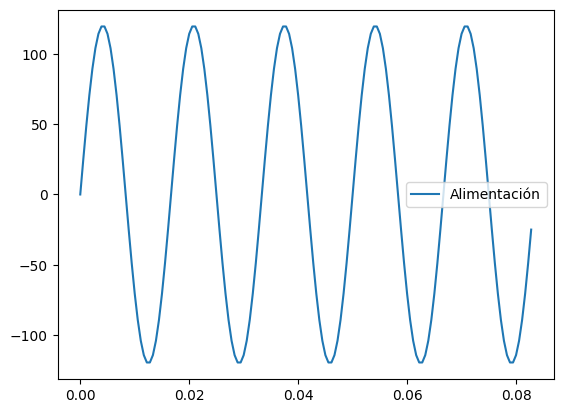

In [40]:
#señales de alimentación y tren de pulsos
plt.plot(t,in_o,label='Alimentación')
plt.legend()
plt.show()

El código genera un gráfico que muestra el tren de pulsos (rec_c) a lo largo del tiempo (t). El tren de pulsos es una señal cuadrada que simula la rectificación completa de una onda senoidal.

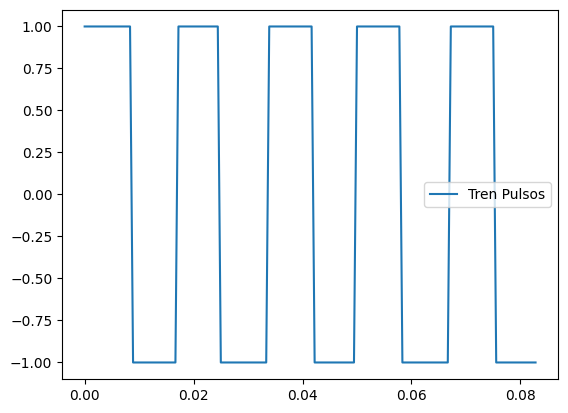

In [41]:
plt.plot(t,rec_c,label='Tren Pulsos')
plt.legend()
plt.show()

El código genera un gráfico que compara dos señales: la entrada rectificada (in_) y la salida del circuito (out). La visualización muestra cómo la señal de entrada rectificada es transformada por el circuito (definido por la función de transferencia) para producir la señal de salida. Las etiquetas en los ejes permiten interpretar las unidades de tiempo y el valor de la salida.

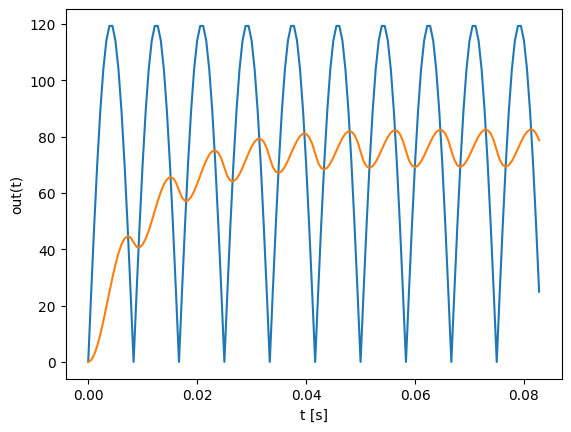

In [42]:
plt.plot(t, in_,label='In(t)')#entrada rectificada
plt.plot(t, out,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

El código calcula y visualiza la Transformada Rápida de Fourier (FFT) de la señal de salida out. La FFT convierte la señal en el dominio del tiempo a su representación en el dominio de la frecuencia, permitiendo analizar las componentes de frecuencia presentes en la señal. El gráfico resultante muestra la magnitud de cada componente de frecuencia, lo que es útil para identificar las frecuencias dominantes y evaluar la distribución espectral de la señal de salida del sistema.

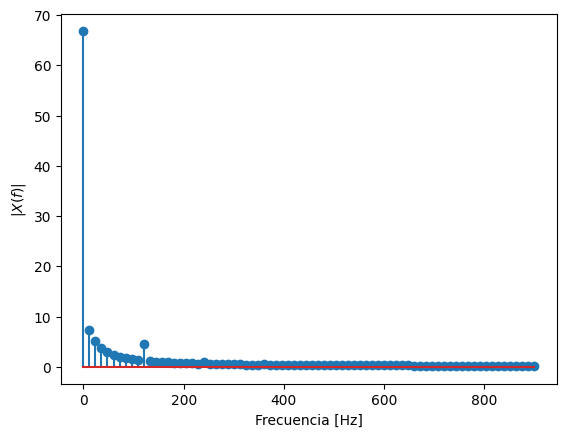

In [43]:
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out)

plt.stem(vfre,abs(Xf/len(out)))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('$|X(f)|$')
plt.show()

Finalmente este código simula la respuesta de un circuito RC ante una señal de entrada senoidal rectificada de onda completa, y luego calcula dos métricas clave: la distorsión armónica total (THD) y el factor de potencia (PF). Utiliza la Transformada de Fourier para analizar el contenido en frecuencia de la señal de salida y calcula el THD comparando las potencias de los armónicos (2ª, 3ª, 4ª) con la potencia de la componente fundamental. Además, calcula el factor de potencia, que mide la eficiencia energética del sistema al relacionar la tensión de la componente fundamental con la tensión total.

In [44]:
# Cálculo del THD (Total Harmonic Distortion)
# El THD se calcula como la relación entre la suma de las potencias de los armónicos y la potencia de la fundamental
fundamental_freq = Fo
harmonics = [2 * fundamental_freq, 3 * fundamental_freq, 4 * fundamental_freq]
fundamental_idx = np.argmin(np.abs(vfre - fundamental_freq))

# Potencia de la componente fundamental
fundamental_power = np.abs(Xf[fundamental_idx])**2

# Potencia de los armónicos
harmonic_powers = [np.abs(Xf[np.argmin(np.abs(vfre - h))])**2 for h in harmonics]
total_harmonic_power = sum(harmonic_powers)

# THD en porcentaje
THD = np.sqrt(total_harmonic_power) / np.sqrt(fundamental_power) * 100

print(f"THD: {THD:.2f}%")

# Cálculo del factor de potencia
# La distorsión del factor de potencia puede ser calculada a partir de la componente fundamental y su relación con el total
V1 = np.sqrt(fundamental_power)  # Tensión de la componente fundamental
Vt = np.sqrt(np.sum(np.abs(Xf)**2))  # Tensión total
PF = V1 / Vt  # Factor de potencia
Distortion = 1 - PF  # Distorsión del factor de potencia

print(f"Distorsión del factor de potencia: {Distortion:.2f}")

THD: 198.00%
Distorsión del factor de potencia: 0.96
